# Part 0: Data Import and Libraries

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("/Users/AustinLiu/Desktop/GSB544-ComputingandMachineLearning/Lab_Data/cannabis_full.csv")
df.head()

,Strain,Type,Rating,Effects,Flavor,Creative,Energetic,Tingly,Euphoric,Relaxed,...,Ammonia,Minty,Tree,Fruit,Butter,Pineapple,Tar,Rose,Plum,Pear
0,100-Og,hybrid,4.0,"Creative,Energetic,Tingly,Euphoric,Relaxed","Earthy,Sweet,Citrus",1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,98-White-Widow,hybrid,4.7,"Relaxed,Aroused,Creative,Happy,Energetic","Flowery,Violet,Diesel",1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1024,sativa,4.4,"Uplifted,Happy,Relaxed,Energetic,Creative","Spicy/Herbal,Sage,Woody",1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,13-Dawgs,hybrid,4.2,"Tingly,Creative,Hungry,Relaxed,Uplifted","Apricot,Citrus,Grapefruit",1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,24K-Gold,hybrid,4.6,"Happy,Relaxed,Euphoric,Uplifted,Talkative","Citrus,Earthy,Orange",0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Part 1: Binary Classification

In [2]:
df2 = df[(df["Type"] == "indica") | (df["Type"] == "sativa")]
df2 = df2.drop(['Effects', 'Flavor'], axis=1)
df2.set_index('Strain', inplace=True)
df2.fillna(0, inplace=True)
df2.head()

,Type,Rating,Creative,Energetic,Tingly,Euphoric,Relaxed,Aroused,Happy,Uplifted,...,Ammonia,Minty,Tree,Fruit,Butter,Pineapple,Tar,Rose,Plum,Pear
Strain,,,,,,,,,,,,,,,,,,,,,
1024,sativa,4.4,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3-Bears-Og,indica,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
303-Og,indica,4.2,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3D-Cbd,sativa,4.6,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3X-Crazy,indica,4.4,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_selector, ColumnTransformer

def modelfunction(regression_label, type_of_regression):
    
    ct = ColumnTransformer(
  [
    ("dummify", 
    OneHotEncoder(sparse_output = False, handle_unknown='ignore'), # do not predict new/unknown categories
    make_column_selector(dtype_include=object)),
    ("standardize", 
    StandardScaler(), 
    make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
)
    
    pipeline = Pipeline(
      [("preprocessing", ct),
      (regression_label, type_of_regression)]
    ).set_output(transform = "pandas")
    
    return pipeline

In [4]:
from sklearn.model_selection import train_test_split

X = df2.drop("Type", axis = 1)
y = df2["Type"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### Metric: 
F1 Score is the ideal metric to score.

## Q1: LDA

In [5]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda_pipeline = modelfunction("lda", LinearDiscriminantAnalysis())

lda_pipelinefit = lda_pipeline.fit(X_train, y_train)

In [6]:
from sklearn.model_selection import cross_val_score
cross_val_score(lda_pipelinefit, X_train, y_train, cv = 5, scoring = "f1_macro").mean()

0.8096659542027751

In [7]:
from sklearn.metrics import mean_squared_error, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, roc_curve, auc

lda_full = LinearDiscriminantAnalysis()
lda_full.fit(X, y)

lda_y_pred = lda_full.predict(X)
pd.DataFrame(confusion_matrix(y, lda_y_pred))

,0,1
0,638,61
1,88,352


## Q2: QDA

In [8]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda_pipeline = modelfunction("qda", QuadraticDiscriminantAnalysis(reg_param = 1.0))

qda_pipelinefit = qda_pipeline.fit(X_train, y_train)

/Users/AustinLiu/anaconda3/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [9]:
cross_val_score(qda_pipelinefit, X_train, y_train, cv = 5, scoring = "f1_macro").mean()


/Users/AustinLiu/anaconda3/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/AustinLiu/anaconda3/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/AustinLiu/anaconda3/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/AustinLiu/anaconda3/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/AustinLiu/anaconda3/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


0.8384516300842183

In [10]:
qda_full = QuadraticDiscriminantAnalysis()
qda_full.fit(X, y)

qda_y_pred = qda_pipelinefit.predict(X)
pd.DataFrame(confusion_matrix(y, qda_y_pred))

/Users/AustinLiu/anaconda3/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


,0,1
0,615,84
1,75,365


## Q3: SVC

In [11]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svc_pipeline = modelfunction("svc", SVC(kernel='linear'))

param_grid = {'svc__C': [0.1, 1, 10, 100, 1000]}

grid_search = GridSearchCV(svc_pipeline, param_grid, cv=5, scoring='f1_macro')

svc_gscv = grid_search.fit(X_train, y_train)

In [12]:
svc_df = pd.DataFrame(svc_gscv.cv_results_)
svc_df[["mean_test_score", "param_svc__C"]].sort_values(by = "mean_test_score", ascending = False)

,mean_test_score,param_svc__C
1,0.810271,1
2,0.810238,10
0,0.809750,0.1
4,0.809094,1000
3,0.808964,100


In [13]:
svc_pipeline_1 = modelfunction("svc", SVC(kernel = "linear", C = 1))

svc_pipeline_1fit = svc_pipeline_1.fit(X, y)

svc_y_pred = svc_pipeline_1fit.predict(X)
pd.DataFrame(confusion_matrix(y, svc_y_pred))

,0,1
0,632,67
1,76,364


## Q4: SVM

In [14]:
svm_pipeline = modelfunction("svm", SVC())

param_grid = {
    'svm__kernel': ["rbf", "poly", "sigmoid"],
    'svm__C': [0.1, 1, 10, 100, 1000]
}

grid_search = GridSearchCV(svm_pipeline, param_grid, cv=5, scoring='f1_macro')

svm_gscv = grid_search.fit(X_train, y_train)

In [15]:
svm_df = pd.DataFrame(svm_gscv.cv_results_)
svm_df[["mean_test_score", "param_svm__C", "param_svm__kernel"]].sort_values(by = "mean_test_score", ascending = False)

,mean_test_score,param_svm__C,param_svm__kernel
5,0.817744,1,sigmoid
8,0.808968,10,sigmoid
2,0.805483,0.1,sigmoid
14,0.790519,1000,sigmoid
3,0.787560,1,rbf
13,0.784181,1000,poly
10,0.781188,100,poly
7,0.780907,10,poly
6,0.780546,10,rbf
9,0.769972,100,rbf


In [16]:
svm_pipeline_1 = modelfunction("svm", SVC(kernel = "sigmoid", C = 1))
svm_pipeline_1fit = svm_pipeline_1.fit(X, y)

svm_y_pred = svm_pipeline_1fit.predict(X)
pd.DataFrame(confusion_matrix(y, svm_y_pred))

,0,1
0,633,66
1,117,323


# Part 2: Natural Multiclass

In [17]:
df3 = df
df3 = df3.drop(['Effects', 'Flavor'], axis=1)
df3.set_index('Strain', inplace=True)
df3.fillna(0, inplace=True)
df3.head()

,Type,Rating,Creative,Energetic,Tingly,Euphoric,Relaxed,Aroused,Happy,Uplifted,...,Ammonia,Minty,Tree,Fruit,Butter,Pineapple,Tar,Rose,Plum,Pear
Strain,,,,,,,,,,,,,,,,,,,,,
100-Og,hybrid,4.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
98-White-Widow,hybrid,4.7,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1024,sativa,4.4,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13-Dawgs,hybrid,4.2,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24K-Gold,hybrid,4.6,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
X = df3.drop("Type", axis = 1)
y = df3["Type"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## Q1: Decision Tree

In [19]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

dtree_pipeline = modelfunction("dt", DecisionTreeClassifier(random_state = 42))

param = {
    'dt__max_depth': [1, 3, 5, 10, None],
    'dt__min_samples_split': [2, 5, 10],
    'dt__min_samples_leaf': [1, 2, 4, 6]}

dtree_gscv = GridSearchCV(dtree_pipeline, param, cv = 5, scoring='f1_macro')
dtree_gscv_fitted = dtree_gscv.fit(X_train, y_train)

In [20]:
dtree_df = pd.DataFrame(dtree_gscv_fitted.cv_results_)
dtree_df
dtree_df = dtree_df[["param_dt__max_depth", "param_dt__min_samples_leaf", "param_dt__min_samples_split", "mean_test_score"]] 
dtree_df.sort_values(by = "mean_test_score", ascending = False).head()

,param_dt__max_depth,param_dt__min_samples_leaf,param_dt__min_samples_split,mean_test_score
20,3,4,10,0.590633
19,3,4,5,0.590633
18,3,4,2,0.590633
23,3,6,10,0.589723
22,3,6,5,0.589723


In [21]:
dtree_pipeline_2 = modelfunction("decision_tree", DecisionTreeClassifier(max_depth = 5,
                                                                        min_samples_leaf = 1,
                                                                        min_samples_split = 10))
dtree_pipeline_2_fit = dtree_pipeline_2.fit(X, y)
dtree_y_pred = dtree_pipeline_2_fit.predict(X)
dtree_y_pred

array(['hybrid', 'hybrid', 'hybrid', ..., 'indica', 'indica', 'indica'],
      dtype=object)

In [22]:
pd.DataFrame(confusion_matrix(y, dtree_y_pred))

,0,1,2
0,904,192,116
1,231,455,13
2,235,27,178


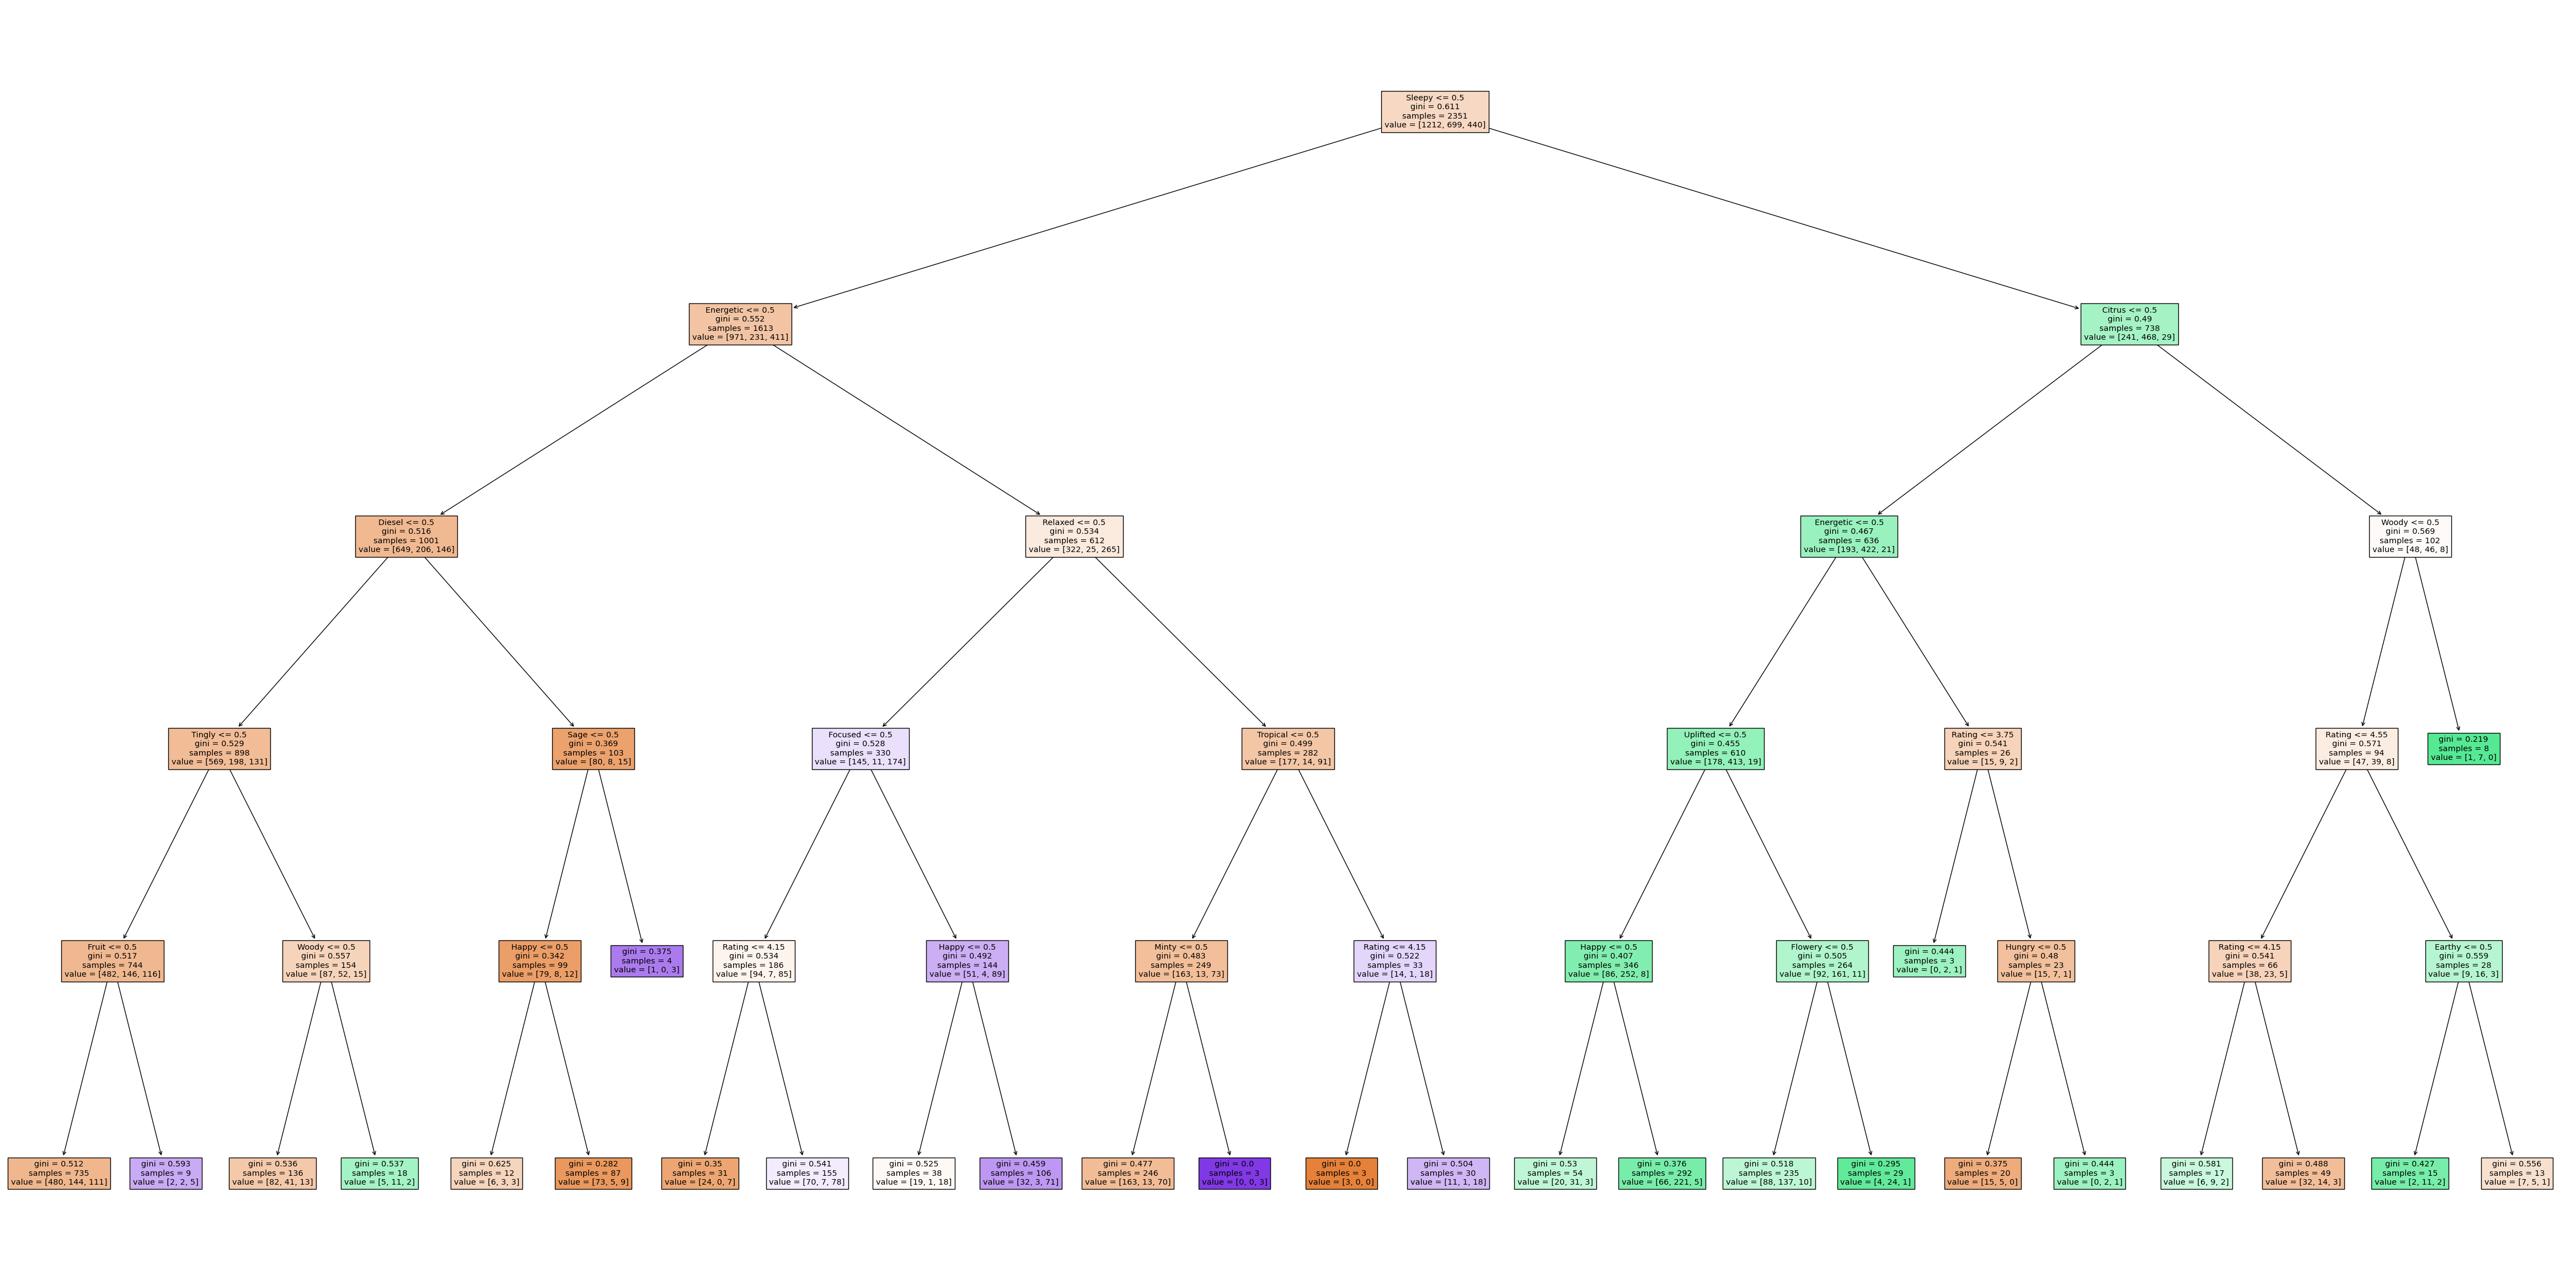

In [23]:
model = DecisionTreeClassifier(max_depth = 5, min_samples_leaf = 1, min_samples_split = 10)
model = model.fit(X, y)
plt.figure(figsize=(60, 30))
plot_tree(model, filled=True, feature_names = X.columns.tolist())
plt.show()

### Interpretation

The first split is sleepy at 0.5. The next 2 splits are energetic and citrus at 0.5

## Q2: LDA, QDA, KNN

In [24]:
lda_pipeline = modelfunction("lda", LinearDiscriminantAnalysis())

lda_pipelinefit = lda_pipeline.fit(X_train, y_train)
cross_val_score(lda_pipelinefit, X_train, y_train, cv = 5, scoring = "f1_macro").mean()

0.5862006522637532

In [25]:
lda_full = LinearDiscriminantAnalysis()
lda_full.fit(X, y)

lda_y_pred = lda_full.predict(X)
pd.DataFrame(confusion_matrix(y, lda_y_pred))

,0,1,2
0,857,213,142
1,214,475,10
2,231,22,187


In [26]:
qda_pipeline = modelfunction("qda", QuadraticDiscriminantAnalysis(reg_param = 1.0))

qda_pipelinefit = qda_pipeline.fit(X_train, y_train)

cross_val_score(qda_pipelinefit, X_train, y_train, cv = 5, scoring = "f1_macro").mean()

/Users/AustinLiu/anaconda3/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/AustinLiu/anaconda3/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/AustinLiu/anaconda3/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/AustinLiu/anaconda3/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/AustinLiu/anaconda3/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/AustinLiu/anaconda3/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear

0.6052108293823351

In [27]:
qda_full = QuadraticDiscriminantAnalysis()
qda_full.fit(X, y)

qda_y_pred = qda_pipelinefit.predict(X)
pd.DataFrame(confusion_matrix(y, qda_y_pred))

/Users/AustinLiu/anaconda3/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


,0,1,2
0,811,219,182
1,209,467,23
2,197,21,222


In [28]:
from sklearn.neighbors import KNeighborsClassifier

knn_pipeline = modelfunction("knn", KNeighborsClassifier())

params = {'knn__n_neighbors': [1, 4, 7, 10, 13], 'knn__weights': ['uniform', 'distance']}

knn_gscv = GridSearchCV(knn_pipeline, params, cv = 5, scoring='f1_macro', n_jobs=-1)
knn_gscv_fitted = knn_gscv.fit(X_train, y_train)

In [29]:
knn_df = pd.DataFrame(knn_gscv_fitted.cv_results_)
knn_df = knn_df[["param_knn__n_neighbors", "mean_test_score"]] 
knn_df.sort_values(by = "mean_test_score", ascending = False)

,param_knn__n_neighbors,mean_test_score
9,13,0.483079
7,10,0.481249
5,7,0.480648
6,10,0.476374
4,7,0.475766
3,4,0.472562
8,13,0.469856
0,1,0.446476
1,1,0.446476
2,4,0.440849


In [30]:
knn_pipeline_10 = modelfunction("knn", KNeighborsClassifier(n_neighbors = 10))
knn_pipeline_10_fit = knn_pipeline_10.fit(X, y)


knn_y_pred = knn_pipeline_10_fit.predict(X)
knn_y_pred

array(['hybrid', 'hybrid', 'hybrid', ..., 'indica', 'indica', 'indica'],
      dtype=object)

In [31]:
pd.DataFrame(confusion_matrix(y, knn_y_pred))

,0,1,2
0,1003,153,56
1,340,354,5
2,301,29,110


## Q3

The metrics were much worse in Part 2 compared to Part 1. Likely the inclusion of the hybrid class made it more difficult for the classification techniques to correctly classify the observations into the types. Since Hybrid is similar to both Sativa and Indica, it makes sense why it could be confused for either.

# Part 3: Multiclass from Binary

## Q1: OVR with SVC and Logistic Regression

In [32]:
df3.head()

,Type,Rating,Creative,Energetic,Tingly,Euphoric,Relaxed,Aroused,Happy,Uplifted,...,Ammonia,Minty,Tree,Fruit,Butter,Pineapple,Tar,Rose,Plum,Pear
Strain,,,,,,,,,,,,,,,,,,,,,
100-Og,hybrid,4.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
98-White-Widow,hybrid,4.7,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1024,sativa,4.4,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13-Dawgs,hybrid,4.2,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24K-Gold,hybrid,4.6,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
df3["type_is_indica"] = (df3["Type"] == "indica").astype(int)
df3["type_is_hybrid"] = (df3["Type"] == "hybrid").astype(int)
df3["type_is_sativa"] = (df3["Type"] == "sativa").astype(int)


df3.head()

,Type,Rating,Creative,Energetic,Tingly,Euphoric,Relaxed,Aroused,Happy,Uplifted,...,Fruit,Butter,Pineapple,Tar,Rose,Plum,Pear,type_is_indica,type_is_hybrid,type_is_sativa
Strain,,,,,,,,,,,,,,,,,,,,,
100-Og,hybrid,4.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0
98-White-Widow,hybrid,4.7,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0
1024,sativa,4.4,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1
13-Dawgs,hybrid,4.2,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0
24K-Gold,hybrid,4.6,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0


In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

f1_scores = {}

for weedtype in ["indica", "sativa", "hybrid"]:
    
    df3[f'type_is_{weedtype}'] = (df3['Type'] == weedtype).astype(int)

    
    X = df3[['Rating', 'Creative', 'Energetic', 'Tingly', 'Euphoric',
       'Relaxed', 'Aroused', 'Happy', 'Uplifted', 'Hungry', 'Talkative',
       'Giggly', 'Focused', 'Sleepy', 'Dry', 'Mouth', 'Earthy', 'Sweet',
       'Citrus', 'Flowery', 'Violet', 'Diesel', 'Spicy/Herbal', 'Sage',
       'Woody', 'Apricot', 'Grapefruit', 'Orange', 'Pungent', 'Grape', 'Pine',
       'Skunk', 'Berry', 'Pepper', 'Menthol', 'Blue', 'Cheese', 'Chemical',
       'Mango', 'Lemon', 'Peach', 'Vanilla', 'Nutty', 'Chestnut', 'Tea',
       'Tobacco', 'Tropical', 'Strawberry', 'Blueberry', 'Mint', 'Apple',
       'Honey', 'Lavender', 'Lime', 'Coffee', 'Ammonia', 'Minty', 'Tree',
       'Fruit', 'Butter', 'Pineapple', 'Tar', 'Rose', 'Plum', 'Pear']]
    y = df3[f'type_is_{weedtype}']

    # Split the Data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

    # Fit the Model
    model = LogisticRegression()
    model.fit(X_train, y_train)
    

    # Make Predictions and Evaluate
    y_pred = model.predict(X_test)
    f1 = f1_score(y_test, y_pred, average = "macro")
    f1_scores[weedtype] = f1


best_cp_category = max(f1_scores, key=f1_scores.get)
best_f1_score = f1_scores[best_cp_category]

print("F1 Scores for each type:", f1_scores)
print(f"Best performing type: {best_cp_category} with an F1 Score of {best_f1_score}")

F1 Scores for each type: {'indica': 0.7486524082768213, 'sativa': 0.6062531959967857, 'hybrid': 0.6084350721420644}
Best performing type: indica with an F1 Score of 0.7486524082768213


In [48]:
f1_scores = {}

for weedtype in ["indica", "sativa", "hybrid"]:
    
    df3[f'type_is_{weedtype}'] = (df3['Type'] == weedtype).astype(int)

    
    X = df3[['Rating', 'Creative', 'Energetic', 'Tingly', 'Euphoric',
       'Relaxed', 'Aroused', 'Happy', 'Uplifted', 'Hungry', 'Talkative',
       'Giggly', 'Focused', 'Sleepy', 'Dry', 'Mouth', 'Earthy', 'Sweet',
       'Citrus', 'Flowery', 'Violet', 'Diesel', 'Spicy/Herbal', 'Sage',
       'Woody', 'Apricot', 'Grapefruit', 'Orange', 'Pungent', 'Grape', 'Pine',
       'Skunk', 'Berry', 'Pepper', 'Menthol', 'Blue', 'Cheese', 'Chemical',
       'Mango', 'Lemon', 'Peach', 'Vanilla', 'Nutty', 'Chestnut', 'Tea',
       'Tobacco', 'Tropical', 'Strawberry', 'Blueberry', 'Mint', 'Apple',
       'Honey', 'Lavender', 'Lime', 'Coffee', 'Ammonia', 'Minty', 'Tree',
       'Fruit', 'Butter', 'Pineapple', 'Tar', 'Rose', 'Plum', 'Pear']]
    y = df3[f'type_is_{weedtype}']

    # Split the Data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

    # Fit the Model
    model = SVC()
    model.fit(X_train, y_train)
    

    # Make Predictions and Evaluate
    y_pred = model.predict(X_test)
    f1 = f1_score(y_test, y_pred, average = "macro")
    f1_scores[weedtype] = f1


best_cp_category = max(f1_scores, key=f1_scores.get)
best_f1_score = f1_scores[best_cp_category]

print("F1 Scores for each type:", f1_scores)
print(f"Best performing type: {best_cp_category} with an F1 Score of {best_f1_score}")

F1 Scores for each type: {'indica': 0.735593220338983, 'sativa': 0.45046728971962613, 'hybrid': 0.5935828877005347}
Best performing type: indica with an F1 Score of 0.735593220338983


## Q2

The best performing was logistic regression with Indica and the worst performing was SVC with Sativa. <br>

Intuitively, Hybrid should have the worst performance with logistic regression.

## Q3: OVO with SVC and Logistic Regression

In [65]:
def func(keep, technique):
    new_df = df3[df3['Type'].isin(keep)]

    # Prepare the Data
    X = new_df[['Rating', 'Creative', 'Energetic', 'Tingly', 'Euphoric',
       'Relaxed', 'Aroused', 'Happy', 'Uplifted', 'Hungry', 'Talkative',
       'Giggly', 'Focused', 'Sleepy', 'Dry', 'Mouth', 'Earthy', 'Sweet',
       'Citrus', 'Flowery', 'Violet', 'Diesel', 'Spicy/Herbal', 'Sage',
       'Woody', 'Apricot', 'Grapefruit', 'Orange', 'Pungent', 'Grape', 'Pine',
       'Skunk', 'Berry', 'Pepper', 'Menthol', 'Blue', 'Cheese', 'Chemical',
       'Mango', 'Lemon', 'Peach', 'Vanilla', 'Nutty', 'Chestnut', 'Tea',
       'Tobacco', 'Tropical', 'Strawberry', 'Blueberry', 'Mint', 'Apple',
       'Honey', 'Lavender', 'Lime', 'Coffee', 'Ammonia', 'Minty', 'Tree',
       'Fruit', 'Butter', 'Pineapple', 'Tar', 'Rose', 'Plum', 'Pear']]
    y = new_df[["Type"]]

    # Split the Data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Fit the Model
    model = technique
    model.fit(X_train, y_train)

    # Make Predictions and Evaluate
    y_pred = model.predict(X_test)
    f1_score_value = f1_score(y_test, y_pred, average='macro')
    
    return f1_score_value

In [68]:
#Indica vs. Sativa
print(func(["indica", "sativa"], LogisticRegression()))
print(func(["indica", "sativa"], SVC()))

0.8655697243932537
0.8482711749214169


/Users/AustinLiu/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/AustinLiu/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [69]:
#Indica vs. Hybrid
print(func(["indica", "hybrid"], LogisticRegression()))
print(func(["indica", "hybrid"], SVC()))

0.7169919536336102
0.7184065934065933


/Users/AustinLiu/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/AustinLiu/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [70]:
#Sativa vs. Hybrid
print(func(["hybrid", "sativa"], LogisticRegression()))
print(func(["hybrid", "sativa"], SVC()))

0.6324019862150745
0.43706574394463665


/Users/AustinLiu/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/AustinLiu/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Q4

The strongest performance was logistic regression differentiating between indica and sativa. This makes sense as they are different from another. The worst performance was SVC with hybrid and sativa. Both parts intuitively make sense

## Q5

Logistic would be OvR and SVC would be OvO.